# Monitor

<div style="text-align:justify">
This notebook presents the best pratices for perform an experiment. First, we need to calculate the sample size that will be used in the experiment. In a on going experiment we need to measure the stability of the values to decide when to stop the experiment and then check the statistical test.
</div>

### Load Packages

In [1]:
import pandas, numpy
from scipy import stats

from matplotlib import pyplot

pyplot.rcParams['figure.figsize'] = (15, 8)

### Sample Size

<div style="text-align:justify">
Calculate the sample size that will be used in the experiment. To do this, we need to use the z-score value defined by the confidence level. This number represents the number of standard deviations above or below the mean population.
</div>
<br>
Below are some confidence values for z-score:

<table align="left">
    <tr>
        <td>80% confidence -></td>
        <td>1.28 z-score</td>
    </tr>
    <tr>
        <td>85% confidence -></td>
        <td>1.44 z-score</td>
    </tr>
    <tr>
        <td>90% confidence -></td>
        <td>1.65 z-score</td>
    </tr>
    <tr>
        <td>95% confidence -></td>
        <td>1.96 z-score</td>
    </tr>
    <tr>
        <td>99% confidence -></td>
        <td>2.58 z-score</td>
    </tr>
</table>

In [2]:
n = 10000 # population size
z = 1.96  # z-score
e = 0.05  # margin of error
p = 0.5   # standard deviation

# sample size
ss = round(((z**2 * p * (1 - p)) / e**2) / ((1 + (z**2 * p * (1 - p))) / (e**2 * n))) + 1
ss

4900

### Stability

<div style="text-align:justify">
The experiment is considered stable when we see more than 5 values that do not cross each other. E.g, see that values from day 6 do not intersect.
</div>

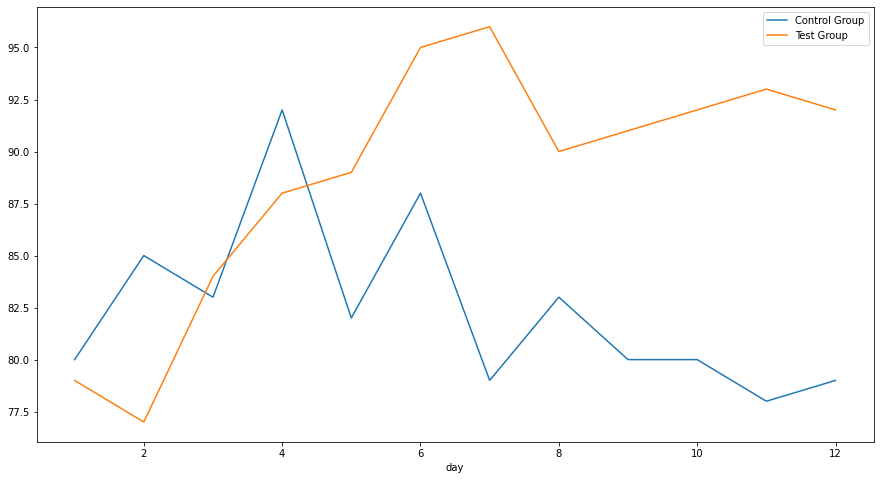

In [3]:
figure, ax = pyplot.subplots()

df = pandas.DataFrame(data={
    'day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'A': [80, 85, 83, 92, 82, 88, 79, 83, 80, 80, 78, 79], # control group
    'B': [79, 77, 84, 88, 89, 95, 96, 90, 91, 92, 93, 92]  # test group
})

df.set_index(df.columns[0]).plot.line(ax = ax)
ax.legend(['Control Group', 'Test Group'])

<div style="text-align:justify">
In the case presented above we observe 12 days and add up the number of orders for each one.
</div>

### Statistical Test

Calculate the T-test for the means of two independent samples of scores.
<br><br>
<div style="text-align:justify">
This is a two-sided test for the null hypothesis that 2 independent samples have identical average values (expected). This test assumes that the populations have identical variances by default.
</div>

In [5]:
stats.ttest_ind(df['A'], df['B'], alternative='two-sided')

Ttest_indResult(statistic=-3.049110967259611, pvalue=0.005883711302973782)

<div style="text-align:justify">
Intuitively, you can read the t-statistic as a normalized difference of averages in both populations, considering their variances and sizes:
</div>

- The larger are the samples, the more serious the difference of averages is because we have more evidence for that.
- The larger are the variances, the less serious the difference of averages is because the absolute difference can be given by randomness only.

The higher is the value of the t-statistic, the more serious is the difference.

<div style="text-align:justify">
The p-value makes this intuition more explicit: it is the probability that the difference of averages can be considered as zero. If the p-value is bellow a threshold, e.g. 0.05, we say that the difference in not zero.
</div>